# Data Exploration for Credit Scoring Analysis

This notebook explores the accepted and rejected loan datasets to understand their structure, missing values, and basic statistics.

## 1. Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [6]:
# Read both datasets
# Read a .gz file
file_path_accepted_gz = '/Users/boraeguz/MSc_Thesis_Missing_Data/data/raw/accepted_2007_to_2018Q4.csv.gz'
accepted_df_full = pd.read_csv(file_path_accepted_gz, compression='gzip')
accepted_df = accepted_df_full.head(5000)
file_path_rejected_gz = '/Users/boraeguz/MSc_Thesis_Missing_Data/data/raw/rejected_2007_to_2018Q4.csv.gz'
rejected_df_full = pd.read_csv(file_path_rejected_gz, compression='gzip')
rejected_df = rejected_df_full.head(5000)


/var/folders/n0/3n_f47sj56dbj3q_xx6vn93w0000gp/T/ipykernel_49489/2315054718.py:4: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted_df_full = pd.read_csv(file_path_accepted_gz, compression='gzip')


## 2. Accepted Loans Dataset Analysis

In [7]:
print("ACCEPTED LOANS DATASET EXPLORATION")
print("="*80)
print(f"\nDataset Shape: {accepted_df.shape}")

print("\nColumn Types:")
print(accepted_df.dtypes)

print("\nMissing Values Analysis:")
missing_accepted = pd.DataFrame({
    'Column': accepted_df.columns,
    'Data Type': accepted_df.dtypes,
    'Missing Values': accepted_df.isnull().sum(),
    'Missing Percentage': (accepted_df.isnull().sum() / len(accepted_df) * 100).round(2)
})
print(missing_accepted.sort_values('Missing Percentage', ascending=False))

print("\nSample of accepted loans (first 5 rows):")
accepted_df.head()

ACCEPTED LOANS DATASET EXPLORATION

Dataset Shape: (5000, 151)

Column Types:
id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymn

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [13]:
# Get frequency of distinct values in the 'loan_status' column
value_counts = accepted_df_full['loan_status'].value_counts()

# Print the value counts
print("Frequency of distinct values in 'loan_status':")
print(value_counts)

Frequency of distinct values in 'loan_status':
loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64


## 3. Rejected Loans Dataset Analysis

In [8]:
print("REJECTED LOANS DATASET EXPLORATION")
print("="*80)
print(f"\nDataset Shape: {rejected_df.shape}")

print("\nColumn Types:")
print(rejected_df.dtypes)

print("\nMissing Values Analysis:")
missing_rejected = pd.DataFrame({
    'Column': rejected_df.columns,
    'Data Type': rejected_df.dtypes,
    'Missing Values': rejected_df.isnull().sum(),
    'Missing Percentage': (rejected_df.isnull().sum() / len(rejected_df) * 100).round(2)
})
print(missing_rejected.sort_values('Missing Percentage', ascending=False))

print("\nSample of rejected loans (first 5 rows):")
rejected_df.head()

REJECTED LOANS DATASET EXPLORATION

Dataset Shape: (5000, 9)

Column Types:
Amount Requested        float64
Application Date         object
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio     object
Zip Code                 object
State                    object
Employment Length        object
Policy Code             float64
dtype: object

Missing Values Analysis:
                                    Column Data Type  Missing Values  \
Risk_Score                      Risk_Score   float64              92   
Amount Requested          Amount Requested   float64               0   
Application Date          Application Date    object               0   
Loan Title                      Loan Title    object               0   
Debt-To-Income Ratio  Debt-To-Income Ratio    object               0   
Zip Code                          Zip Code    object               0   
State                                State    object               0   
Employment Length   

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


## 4. Missing Values Visualization

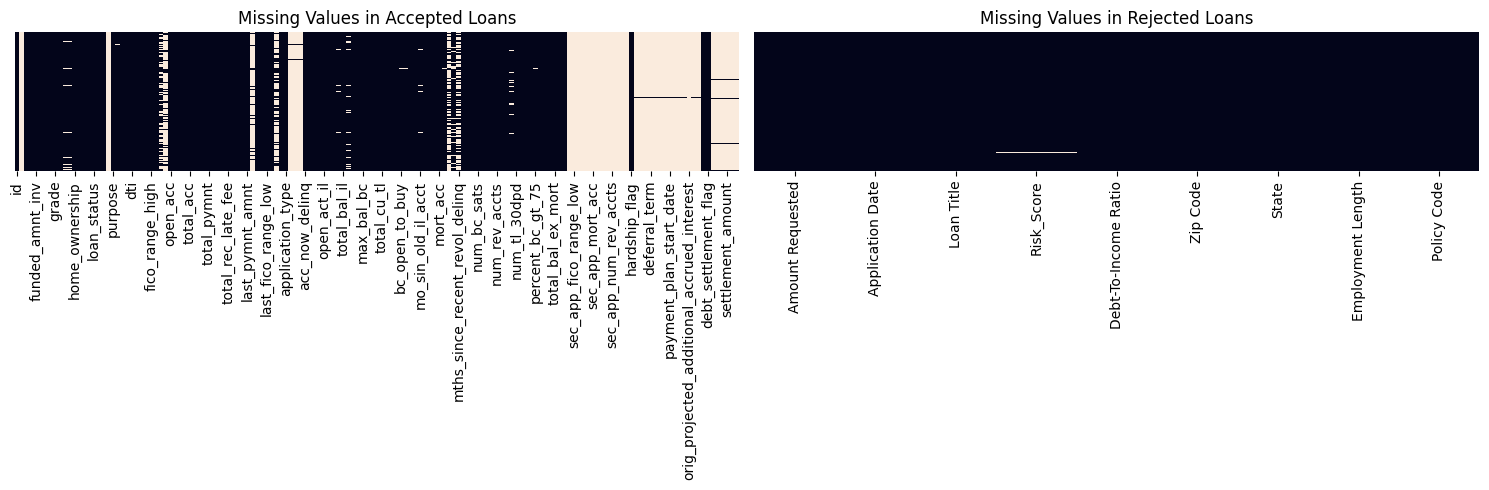

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(accepted_df.isnull(), yticklabels=False, cbar=False)
plt.title('Missing Values in Accepted Loans')

plt.subplot(1, 2, 2)
sns.heatmap(rejected_df.isnull(), yticklabels=False, cbar=False)
plt.title('Missing Values in Rejected Loans')

plt.tight_layout()
plt.show()

## 5. Dataset Comparison

In [10]:
# Compare common columns between datasets
common_columns = set(accepted_df.columns) & set(rejected_df.columns)
unique_to_accepted = set(accepted_df.columns) - set(rejected_df.columns)
unique_to_rejected = set(rejected_df.columns) - set(accepted_df.columns)

print("COLUMN COMPARISON")
print("="*80)
print(f"\nCommon columns between datasets: {len(common_columns)}")
print(sorted(common_columns))
print(f"\nColumns unique to accepted loans: {len(unique_to_accepted)}")
print(sorted(unique_to_accepted))
print(f"\nColumns unique to rejected loans: {len(unique_to_rejected)}")
print(sorted(unique_to_rejected))

COLUMN COMPARISON

Common columns between datasets: 0
[]

Columns unique to accepted loans: 151
['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'debt_settlement_flag_date', 'deferral_term', 'delinq_2yrs', 'delinq_amnt', 'desc', 'disbursement_method', 'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_flag', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'home_ownership', 'id', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment

## 6. Basic Statistics

BASIC STATISTICS

Total number of loan applications: 10000
Number of accepted loans: 5000
Number of rejected loans: 5000
Acceptance rate: 50.00%


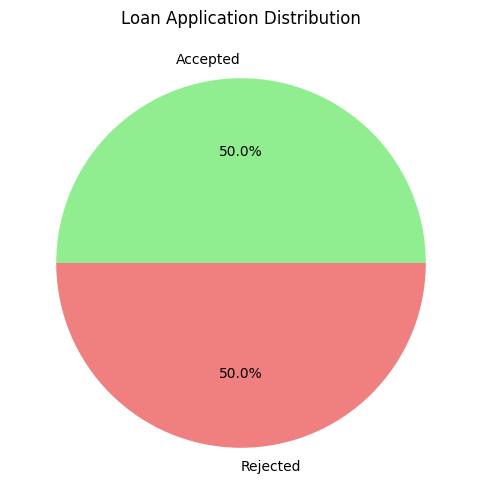

In [11]:
print("BASIC STATISTICS")
print("="*80)
print(f"\nTotal number of loan applications: {len(accepted_df) + len(rejected_df)}")
print(f"Number of accepted loans: {len(accepted_df)}")
print(f"Number of rejected loans: {len(rejected_df)}")
print(f"Acceptance rate: {(len(accepted_df) / (len(accepted_df) + len(rejected_df)) * 100):.2f}%")

# Visualize acceptance vs rejection ratio
plt.figure(figsize=(8, 6))
plt.pie([len(accepted_df), len(rejected_df)], 
        labels=['Accepted', 'Rejected'], 
        autopct='%1.1f%%',
        colors=['lightgreen', 'lightcoral'])
plt.title('Loan Application Distribution')
plt.show()